# CA02 - Training Perceptron and Adaline models

Make sure you: a) describe briefly what you intend to do using markdown cells; b) comment your code properly but briefly, such that the reader can easily understand what the code is doing.


## Imports

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import the relevant classes from adaline.py and perceptron.py in the classifiers folder
from classifiers.adaline import AdalineGD
from classifiers.perceptron import Perceptron

## Loading and exploring data


Visualise the raw data with appropriate plots and inspect it for possible outliers or inconsistencies. Comment briefly on what you see and how this will impact the performance of the perceptron and adaline. For this use no more than three sentences.

In [136]:
# Insert your code below
# ======================

# Loading the dataset
wine_df = pd.read_csv('./assets/wine.csv', sep=',')

# Descriptive stats
describe_stats = wine_df.describe()
describe_stats


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,class
count,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000
mean,8.278974,0.527778,0.272603,2.441740,0.088531,16.068210,47.700876,0.996668,3.309900,0.660225,10.413934,0.534418
std,1.678945,0.179432,0.199947,1.263095,0.050939,10.401708,33.388266,0.001876,0.159114,0.173437,1.059409,0.499126
min,4.700000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.370000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.500000,0.995545,3.200000,0.550000,9.500000,0.000000
50%,7.900000,0.530000,0.260000,2.200000,0.079000,14.000000,39.000000,0.996680,3.300000,0.620000,10.100000,1.000000
75%,9.200000,0.640000,0.425000,2.500000,0.091000,22.000000,64.000000,0.997800,3.400000,0.730000,11.100000,1.000000
max,15.000000,1.330000,1.000000,15.400000,0.610000,68.000000,289.000000,1.003690,4.010000,2.000000,14.000000,1.000000


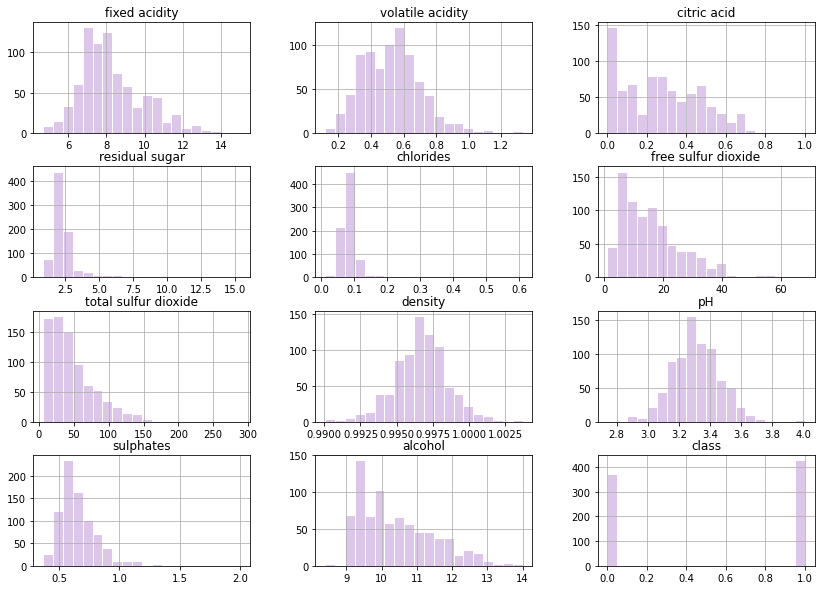

In [100]:
# Histogram for each feature
wine_df.hist(bins=20, figsize=(14,10), color='#Dcc6ea', edgecolor='white')
plt.show()

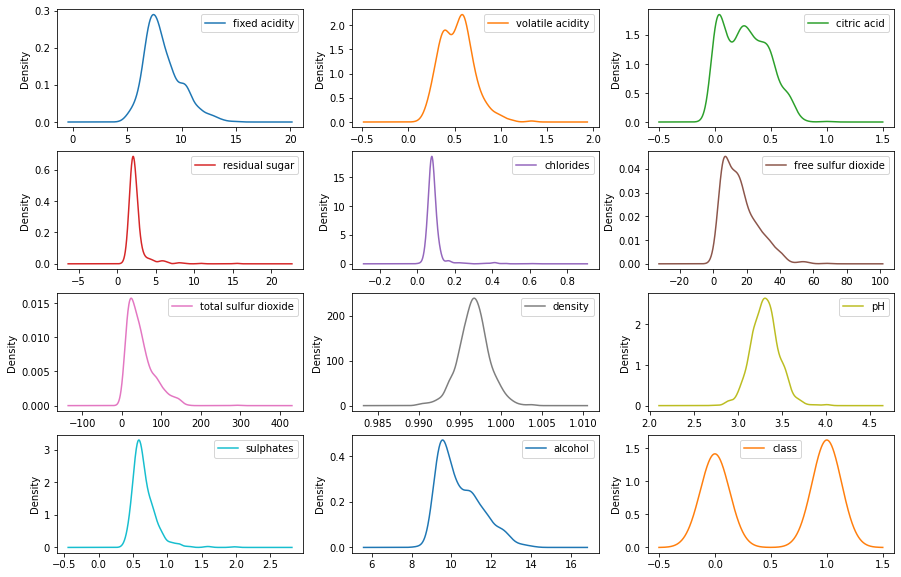

In [101]:
# Desity plot for each feature
wine_df.plot.density(subplots=True, figsize=(15,10), layout=(4,3), sharex=False, sharey=False)
plt.show()

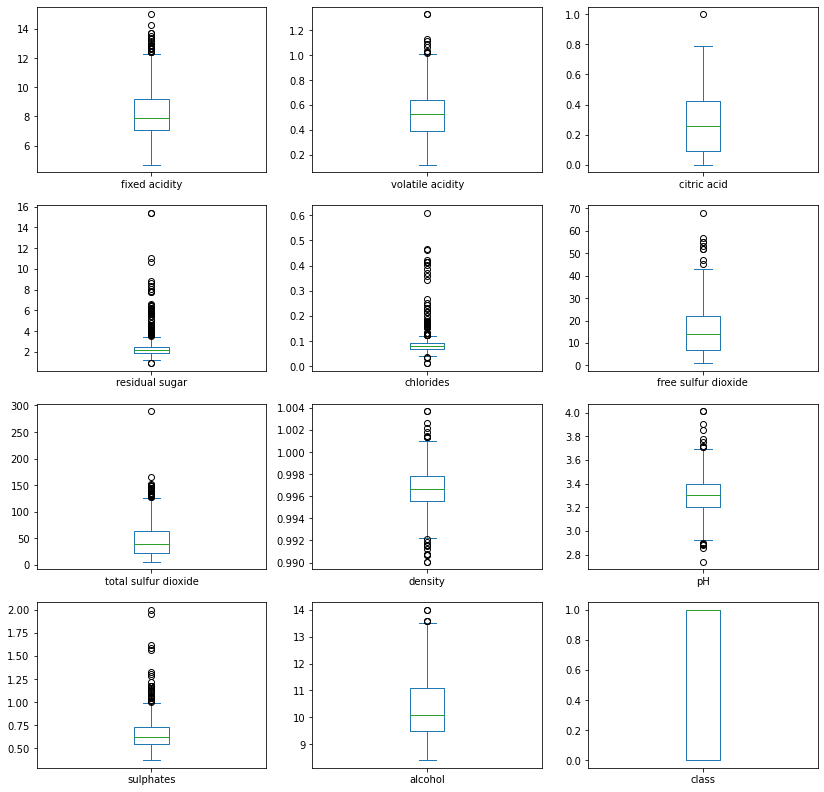

In [102]:
# Boxplots for all features
wine_df.plot.box(subplots=True, figsize=(14,14), layout=(4, 3), sharex=False, sharey=False)
plt.show()

The boxplot for the total sulfur dioxide feature has an outlier at 289. This is quite big concidering the mean is 39 and the standard deviation is 33.4 according to the descriptive statistics. Other features with big outliers are residual sugar, density and sulphates. 

Text(0.5, 1.0, 'Correlation Heatmap')

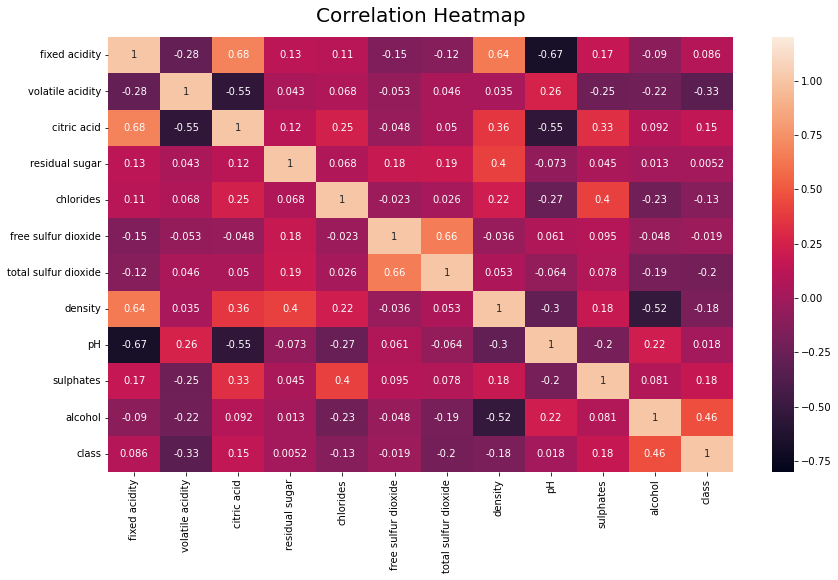

In [103]:
# Correlation heatmap for all features
plt.figure(figsize=(14, 8))
heatmap = sns.heatmap(data=wine_df.corr(), vmin=-0.8, vmax=1.2, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=15)
plt.show()

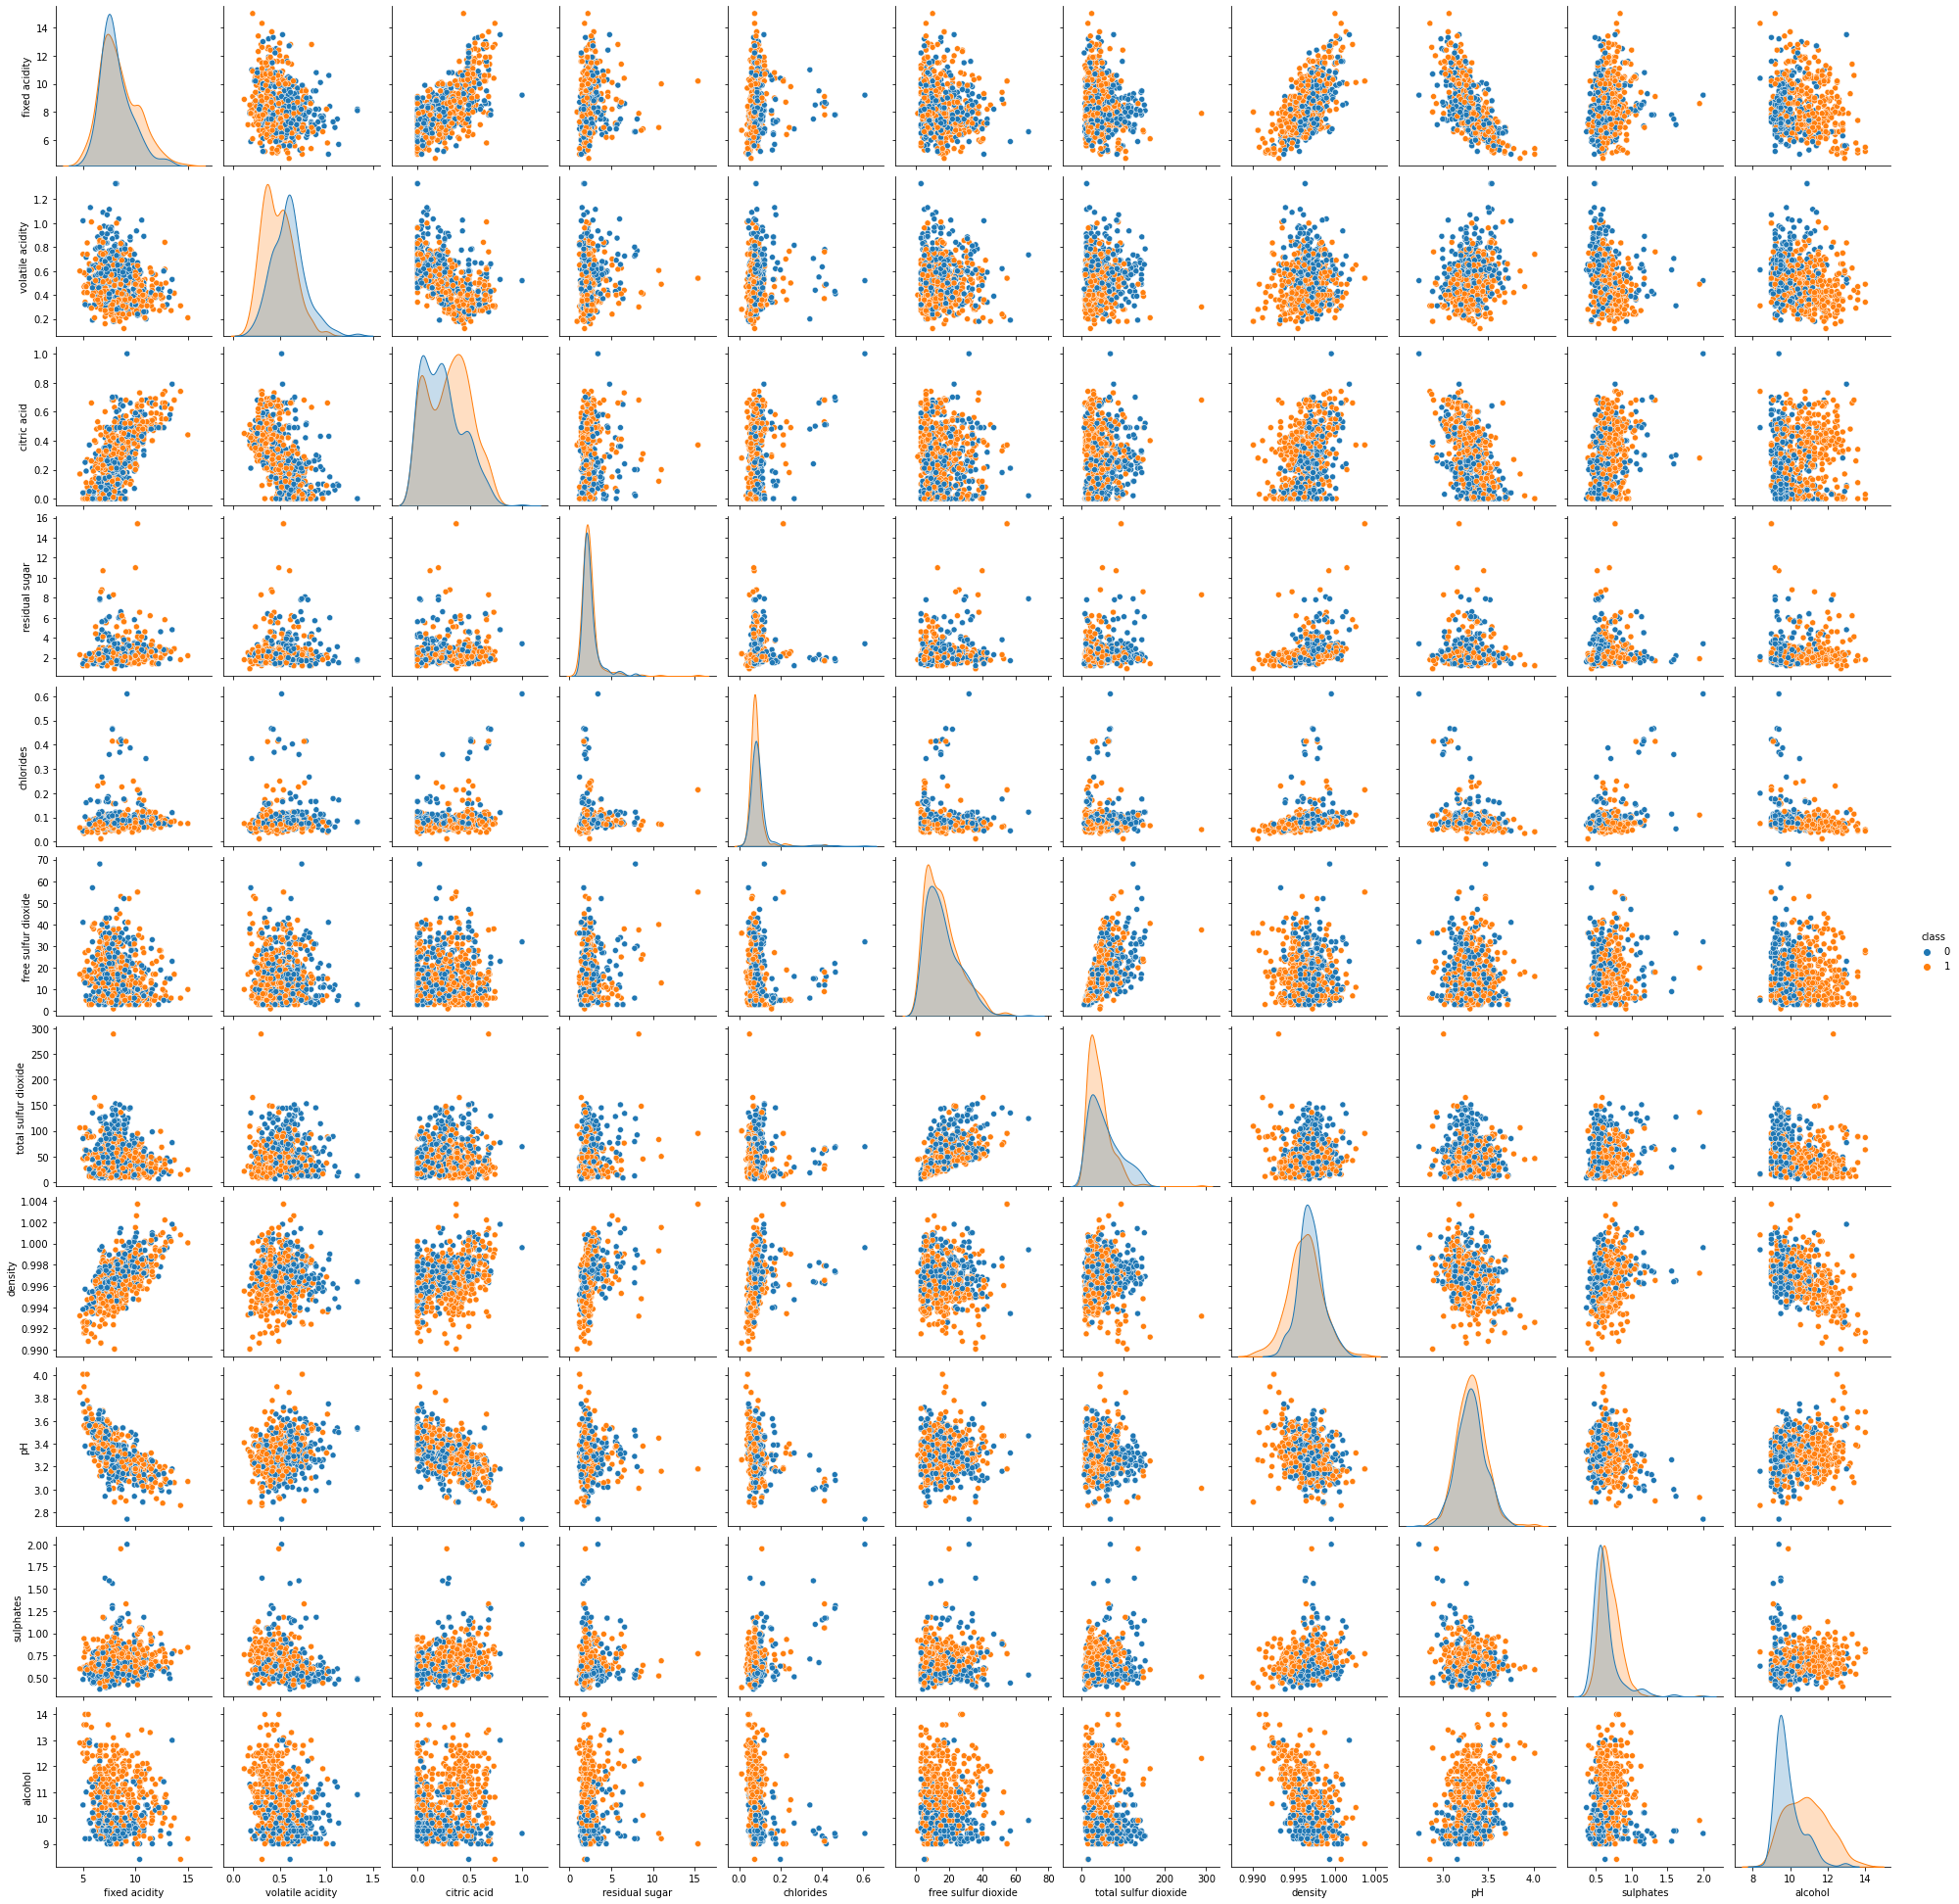

In [104]:
# Pairplot for all features in dataset
sns.pairplot(wine_df, hue='class')
plt.show()

By the scatterplots we can see that the classes are not linearly seperable. Both perceptron and adaline are linear classifiers, so their predictions on this dataset may not be so good. 

## Preprocessing data and training models

- Split the data into training and test_sets, where 400 samples are used for training
- Make sure the target values are appropriate for the Adaline and Perceptron classifiers

With each of the 400 models, you should predict the classes of the unseen samples in the test data and compute the test set classification accuracy. Store the results in a (8 x 50) numpy array or a pandas dataframe.

__Preprocessing:__

In [137]:
# Insert your code below
# ======================

# Selecting features
X = wine_df.iloc[:, :-1] # data
y = wine_df['class']     # target

# Splitting the data into training and test set
X_train = X[:400][:]
X_test = X[400:][:]
y_train = y[:400][:]
y_test = y[400:][:]

# Changing the targets that are 0 to -1
wine_df.loc[y == 0, "class"] = -1  

__Training:__

In [164]:
# Insert your code below
# ======================

perceptron_accuracy = []
adaline_accuracy = []

for k in range(1, 9):
    perceptron_accuracy_list = [] 
    adaline_accuracy_list = []
    
    for epoch in range(1, 51):
        # Creating subsets
        data_subset = X_train[:50*k] 
        target_subset = y_train[:50*k]
        
        # Scaling the data (in subsets)
        X_train_sc = (data_subset - np.mean(data_subset, axis=0)) / np.std(data_subset, axis=0)
        X_test_sc = (X_test - np.mean(data_subset, axis=0)) / np.std(data_subset, axis=0)
        
        # ==== Training perceptron ====
        percept = Perceptron(eta=0.0001, n_iter=epoch, random_state=1) # Initializes Perceptron classifier
        percept.fit(X_train_sc.values, target_subset)                  # Fitting the model
        predict_percept = percept.predict(X_test_sc)                   # Labales are predicted based on trained model
       
        # Calculating the test accuracy and adding them to a list
        perceptron_accuracy_list.append((y_test == predict_percept).sum() / len(y_test))
        
        # ==== Training ADALINE ====
        adaline = AdalineGD(eta=0.0001, n_iter=epoch, random_state=1)
        adaline.fit(X_train_sc.values, target_subset)                  # Fitting the model
        predict_adaline = adaline.predict(X_test_sc)                   # Labales are predicted based on trained model
        
        # Calculating the test accuracy and adding them to a list
        adaline_accuracy_list.append((y_test == predict_adaline).sum() / len(y_test))    
    
    perceptron_accuracy.append(perceptron_accuracy_list)    
    adaline_accuracy.append(adaline_accuracy_list)

# Create dataframes of test accuracies 
perceptron_df = pd.DataFrame(perceptron_accuracy)
adaline_df = pd.DataFrame(adaline_accuracy) 


## Visualizing results

Plot a heatmap of the results (test set classification accuracy) using Python plotting packages matplotlib or seaborn (Lenker til en ekstern side.). See below what the heatmaps should look like for the two classification algorithms.

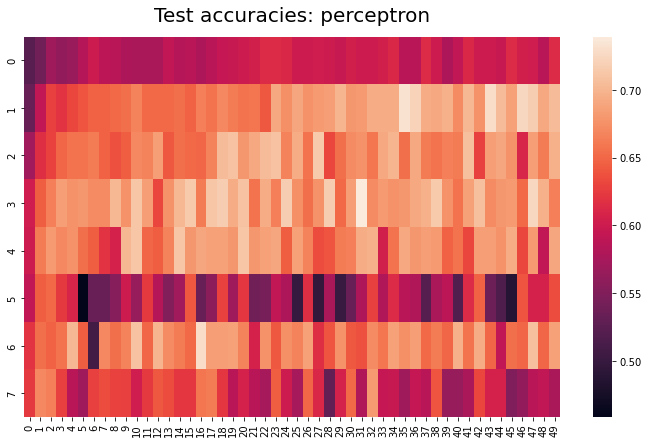

In [187]:
# Insert your code below
# ======================

plt.figure(figsize = (12, 7))
heatmap_percept = sns.heatmap(perceptron_df)
heatmap_percept.set_title('Test accuracies: perceptron', fontdict={'fontsize':20}, pad=15)
plt.show()

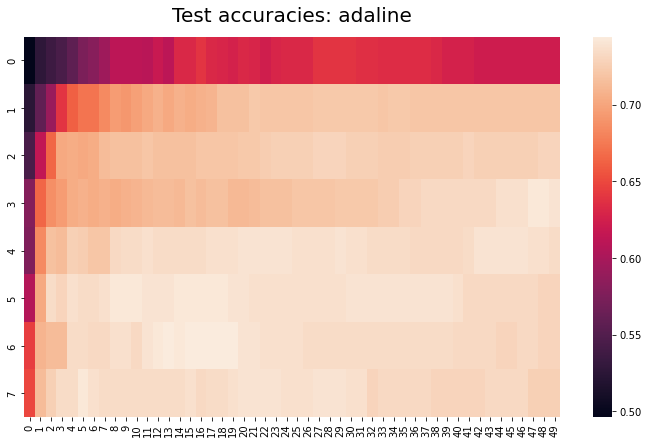

In [188]:
plt.figure(figsize = (12, 7))
heatmap_adaline = sns.heatmap(adaline_df)
heatmap_adaline.set_title('Test accuracies: adaline', fontdict={'fontsize':20}, pad=15)
plt.show()

## Metrics

Provide the maximum test set classification accuracy for each, the perceptron classifier and the adaline classifier and information on with which combination of number training data samples and number of epochs the best classification accuracy was achieved. 

In [186]:
# Insert your code below
# ======================

# Max value for perceptron and adaline
max_percept = max(max(perceptron_accuracy)) 
max_ada = max(max(adaline_accuracy))    

# Positions
position_per = np.unravel_index(np.argmax(perceptron_accuracy, axis=None), 
                                (len(perceptron_accuracy), len(perceptron_accuracy[0])))
position_ada = np.unravel_index(np.argmax(adaline_accuracy, axis=None), 
                                (len(adaline_accuracy), len(adaline_accuracy[0]))) 

print(f'Perceptron: The maximum test set classification accuracy is {max_percept:.2f} in row {position_per[0]*50} \
with {position_per[1]} epochs.')
print(f'Adaline: The maximum test set classification accuracy is {max_ada:.2f} in row {position_ada[0]*50} \
with {position_ada[1]} epochs.')


Perceptron: The maximum test set classification accuracy is 0.68 in row 150 with 31 epochs.
Adaline: The maximum test set classification accuracy is 0.74 in row 300 with 13 epochs.


## Discussion

The training time of the simpler perceptron algorithm is quite a bit longer than the training time of the adaline algorithm. What might be the reason for this?

__Insert your answer below__

=====================

There can be several reasons for this. For instance perceptron updates the weights one sample at a time until all of the samples are classified correctly. If the training set is large this process can be slow. On the other hand adaline update the weights with the gradient of the error function continously. In some cases this can converge faster than the perceptron algorithm. 

Also the adaline function does not include the bias term when updating the weights which the perceptron algorithm does. This can also make the perceptron algorithm slower. 